## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

## Load the dataframe

In [3]:
cleaned_df = pd.read_csv('./data/train_poses.csv', header=None)

In [4]:
cleaned_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.291707,2.074543,0.662039,0.503438,0.472936,0.586355,0.122908,0.120773,...,0.008426,0.329692,1.798961,0.335894,0.236632,0.411645,3.602510,1.464539,4.616057,1.657540
1,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.281298,6.205894,0.673161,0.539954,0.532312,0.570672,0.171361,0.320482,...,1.282794,0.671597,1.000394,0.457557,0.280459,135.178251,1.046931,0.773352,0.004855,0.188475
2,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.277194,0.912544,0.690549,0.518067,0.595527,0.649021,0.091985,0.149161,...,1.345013,3.775660,0.962267,1.539613,0.259676,0.189585,2.703486,0.300920,0.002980,0.760729
3,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.016143,0.099022,4.990914,0.976632,0.931543,3.113440,0.193121,0.247969,...,0.905465,48.503464,3.285642,0.946892,1.073834,1.245089,1.035593,66.578705,0.796075,23.117809
4,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.029587,0.071805,0.990886,0.995791,0.574596,2.358390,0.126310,0.161439,...,0.826061,1.716687,46.455697,1.591566,0.389904,1.228754,1.076126,20.796774,0.633412,0.667481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,train/cow_bite/salient2/2052108669082759e3e4b2...,cow_bite,1.288718,0.988364,0.617838,0.946269,0.992939,0.752384,0.079084,0.056623,...,2.053420,0.227074,0.608825,0.567607,0.615583,0.714534,2.425401,0.593737,0.814542,2.631848
2223,train/cow_bite/salient2/2052108669082759e3e4b2...,cow_bite,2.263914,1.120102,0.622919,1.563957,1.067865,0.731689,0.079425,0.089339,...,1.904810,0.020718,0.976271,0.561709,0.643438,4.604948,1.893663,0.809256,0.888326,1.982766
2224,train/cow_bite/salient2/2052108669082759e3e4b2...,cow_bite,1.354958,1.024649,0.677885,1.800429,0.825829,0.600945,0.059426,0.040518,...,1.941325,0.313129,1.163226,0.560497,0.637518,1.273133,2.409596,0.523694,0.819333,2.867932
2225,train/cow_bite/salient2/2052108669082759e3e4b2...,cow_bite,1.341677,1.044180,0.604585,1.846727,0.876457,0.658565,0.059815,0.044791,...,1.801214,0.211580,1.230905,0.546398,0.622963,2.605702,2.533687,0.580812,0.850169,2.634838


In [5]:
def extract_salient(row):
    match = re.search(r"salient[12]", row[0])

    if match:
        salient_type = match.group()
    else:
        print("Salient type not found")

    if "salient1" == salient_type:
        return 0
    elif "salient2" == salient_type:
        return 1
    else:
        return -1


cleaned_df["salient"] = cleaned_df.apply(extract_salient, axis=1)
cleaned_df["salient"] = cleaned_df["salient"].astype(int)

cleaned_df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,salient
0,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.291707,2.074543,0.662039,0.503438,0.472936,0.586355,0.122908,0.120773,...,0.329692,1.798961,0.335894,0.236632,0.411645,3.602510,1.464539,4.616057,1.657540,0
1,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.281298,6.205894,0.673161,0.539954,0.532312,0.570672,0.171361,0.320482,...,0.671597,1.000394,0.457557,0.280459,135.178251,1.046931,0.773352,0.004855,0.188475,0
2,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.277194,0.912544,0.690549,0.518067,0.595527,0.649021,0.091985,0.149161,...,3.775660,0.962267,1.539613,0.259676,0.189585,2.703486,0.300920,0.002980,0.760729,0
3,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.016143,0.099022,4.990914,0.976632,0.931543,3.113440,0.193121,0.247969,...,48.503464,3.285642,0.946892,1.073834,1.245089,1.035593,66.578705,0.796075,23.117809,0
4,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.029587,0.071805,0.990886,0.995791,0.574596,2.358390,0.126310,0.161439,...,1.716687,46.455697,1.591566,0.389904,1.228754,1.076126,20.796774,0.633412,0.667481,0


## Preprocessing

In [6]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Identify columns to normalize (excluding the first two columns)
# columns_to_normalize = cleaned_df.columns[2:]

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the selected columns
# cleaned_df[columns_to_normalize] = scaler.fit_transform(cleaned_df[columns_to_normalize])

In [7]:
cleaned_df['video_name'] = cleaned_df[0].apply(lambda x: x.split("/")[-2].split('.mp4')[0].split('_')[0])
df = cleaned_df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,salient,video_name
0,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.291707,2.074543,0.662039,0.503438,0.472936,0.586355,0.122908,0.120773,...,1.798961,0.335894,0.236632,0.411645,3.602510,1.464539,4.616057,1.657540,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
1,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.281298,6.205894,0.673161,0.539954,0.532312,0.570672,0.171361,0.320482,...,1.000394,0.457557,0.280459,135.178251,1.046931,0.773352,0.004855,0.188475,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
2,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.277194,0.912544,0.690549,0.518067,0.595527,0.649021,0.091985,0.149161,...,0.962267,1.539613,0.259676,0.189585,2.703486,0.300920,0.002980,0.760729,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
3,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.016143,0.099022,4.990914,0.976632,0.931543,3.113440,0.193121,0.247969,...,3.285642,0.946892,1.073834,1.245089,1.035593,66.578705,0.796075,23.117809,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...
4,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.029587,0.071805,0.990886,0.995791,0.574596,2.358390,0.126310,0.161439,...,46.455697,1.591566,0.389904,1.228754,1.076126,20.796774,0.633412,0.667481,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...


In [8]:
video_groups = df.groupby('video_name')
video_groups.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,salient,video_name
0,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.291707,2.074543,0.662039,0.503438,0.472936,0.586355,0.122908,0.120773,...,1.798961,0.335894,0.236632,0.411645,3.602510,1.464539,4.616057,1.657540,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
1,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.281298,6.205894,0.673161,0.539954,0.532312,0.570672,0.171361,0.320482,...,1.000394,0.457557,0.280459,135.178251,1.046931,0.773352,0.004855,0.188475,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
2,train/cow_bite/salient1/9c08225dd12cdfdfbdc000...,cow_bite,1.277194,0.912544,0.690549,0.518067,0.595527,0.649021,0.091985,0.149161,...,0.962267,1.539613,0.259676,0.189585,2.703486,0.300920,0.002980,0.760729,0,9c08225dd12cdfdfbdc00043de3d390c275458ebe07d07...
3,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.016143,0.099022,4.990914,0.976632,0.931543,3.113440,0.193121,0.247969,...,3.285642,0.946892,1.073834,1.245089,1.035593,66.578705,0.796075,23.117809,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...
4,train/cow_bite/salient1/056837a2b71e7d93ad65e3...,cow_bite,0.029587,0.071805,0.990886,0.995791,0.574596,2.358390,0.126310,0.161439,...,46.455697,1.591566,0.389904,1.228754,1.076126,20.796774,0.633412,0.667481,0,056837a2b71e7d93ad65e388dbb0c670a0a440c3ba4f88...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,train/cow_bite/salient2/73c745847dc41f6e0c54fe...,cow_bite,2.896324,1.634913,0.765742,0.048560,0.969402,1.143713,0.164640,0.251550,...,1.282543,1.033893,0.668454,166.435923,0.482450,1.232838,2.024724,0.675327,1,73c745847dc41f6e0c54fefcadfd13613a200d58b70730...
2052,train/cow_bite/salient2/73c745847dc41f6e0c54fe...,cow_bite,2.901801,1.595189,0.753202,1.051644,1.005375,1.037106,0.171384,0.270772,...,3.901119,4.141630,0.680799,0.661246,0.953838,1.194054,0.551843,218.036366,1,73c745847dc41f6e0c54fefcadfd13613a200d58b70730...
2100,train/cow_bite/salient2/c81785443adb4396f41032...,cow_bite,0.729081,0.283487,0.422153,6.201022,1.168582,1.252964,0.147087,0.031875,...,0.402515,0.520373,0.652845,72.733868,0.893421,0.145598,0.219921,1.237099,1,c81785443adb4396f41032f03038f66f5772097bd7bf6f...
2101,train/cow_bite/salient2/c81785443adb4396f41032...,cow_bite,0.714142,0.283662,0.435888,6.916612,1.362509,1.169142,0.149489,0.034073,...,0.384418,0.517063,0.645848,3.753133,0.881447,0.144613,0.216935,1.220549,1,c81785443adb4396f41032f03038f66f5772097bd7bf6f...


In [9]:
from sklearn.model_selection import train_test_split

# Get unique video names
video_names = df['video_name'].unique()

# Split video names into train, validation, and test
train_videos, temp_videos = train_test_split(video_names, test_size=0.4, random_state=42)
val_videos, test_videos = train_test_split(temp_videos, test_size=0.5, random_state=42)

# Create the corresponding dataframes
train_df = df[df['video_name'].isin(train_videos)]
val_df = df[df['video_name'].isin(val_videos)]
test_df = df[df['video_name'].isin(test_videos)]

In [10]:
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('val_split.csv', index=False)
test_df.to_csv('test_split.csv', index=False)

## Train the tree

In [11]:
X_train = df.drop(columns=[0, 1, "video_name", "salient"])
y_train = df["salient"]

In [12]:
# Initialize the Decision Tree Classifier with hyperparameters to prevent overfitting
clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,         # Limit the maximum depth of the tree
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=2,   # Minimum number of samples required to be at a leaf node
)

In [13]:
# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

## Predict each frame

In [14]:
val_df.iloc[0]['video_name']

'46e9cc048a75d3c6404323ffa5ff8668c6b96a1640c61a52ec1155ef8b13d8bc'

In [15]:
test_dir = os.path.join(os.getcwd(), '/data/test_poses')

In [16]:
video_path = '/home/sadat/Desktop/automatic-counting/classifier/data/test_poses/d40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719fb52af72bf43224086_1.npy'

In [17]:
# Load the NumPy array from the file
np_array = np.load(video_path)

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(np_array)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.036156,1.328076,0.622291,1.561863,0.530454,0.489376,0.046021,0.041808,0.112344,0.184506,...,0.265445,0.201365,19.839740,0.098177,0.661589,5.647221,1.947944,0.882894,1.121087,4.773412
1,1.041428,1.170048,0.612886,1.565469,0.590890,0.560485,0.053291,0.049629,0.114731,0.186689,...,0.289734,0.174462,19.205025,0.105046,0.668192,6.749257,1.949250,0.877600,1.142354,1.930524
2,1.042877,1.183422,0.618373,1.674895,0.791427,0.732120,0.074341,0.079260,0.118217,0.192500,...,0.272063,0.032766,7.311908,0.109017,0.659517,2.576224,1.775274,1.049747,1.114817,1.653158
3,1.057282,1.208340,0.607911,1.535236,0.853363,0.845752,0.085888,0.086136,0.115187,0.178566,...,0.221698,0.106857,10.956512,0.153144,0.670328,5.977320,2.032565,0.950831,1.121813,2.968092
4,1.053550,1.325134,0.595905,3.956137,0.880901,0.905772,0.109852,0.094173,0.101104,0.161128,...,0.234523,0.129635,0.411339,0.139274,0.668661,0.303801,2.013005,0.961625,1.221020,3.488216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1.408995,1.018752,0.551805,0.516937,0.708830,0.691605,0.064835,0.092182,0.097039,0.178815,...,0.177550,0.843195,1.234872,0.081499,0.627126,1.277195,0.713251,1.672871,0.524106,0.766487
130,1.408903,1.018624,0.551840,0.516988,0.709169,0.692035,0.064811,0.092143,0.097041,0.178852,...,0.177447,0.843082,1.234975,0.081169,0.627041,1.277239,0.713137,1.672909,0.524067,0.766555
131,1.409740,1.018489,0.552346,0.516977,0.708648,0.692139,0.064747,0.092014,0.097081,0.178897,...,0.177481,0.842870,1.235465,0.081263,0.626836,1.277192,0.713110,1.672811,0.524240,0.766284
132,1.408901,1.018646,0.552183,0.516926,0.709964,0.692331,0.064891,0.092206,0.096892,0.178599,...,0.177728,0.843122,1.235336,0.081396,0.626851,1.277142,0.713339,1.672784,0.524272,0.766426


In [19]:
from scipy.signal import savgol_filter

# Predict the class for each row
predictions = clf.predict(df)

# Get predicted probabilities
probabilities = clf.predict_proba(df)

original_df = df.copy()
df = original_df.copy()

# Optionally add predictions to the dataframe
df['prediction'] = predictions

# Get the predictions proba
df['Class_0_Confidence'] = probabilities[:, 0]
df['Class_1_Confidence'] = probabilities[:, 1]

# Define the window size for SMA
window_size = 5

# Compute the SMA
df['SMA_Confidence'] = df['Class_1_Confidence'].rolling(window=window_size, min_periods=1).mean()

# Define parameters for Savitzky-Golay filter
window_length = 11  # Window length must be odd
polyorder = 2       # Polynomial order

# Apply Savitzky-Golay filter
df['SG_Confidence'] = savgol_filter(df['Class_1_Confidence'], window_length=window_length, polyorder=polyorder)

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,prediction,Class_0_Confidence,Class_1_Confidence,SMA_Confidence,SG_Confidence
0,1.036156,1.328076,0.622291,1.561863,0.530454,0.489376,0.046021,0.041808,0.112344,0.184506,...,5.647221,1.947944,0.882894,1.121087,4.773412,0,0.978723,0.021277,0.021277,0.029014
1,1.041428,1.170048,0.612886,1.565469,0.590890,0.560485,0.053291,0.049629,0.114731,0.186689,...,6.749257,1.949250,0.877600,1.142354,1.930524,0,0.978723,0.021277,0.021277,0.022050
2,1.042877,1.183422,0.618373,1.674895,0.791427,0.732120,0.074341,0.079260,0.118217,0.192500,...,2.576224,1.775274,1.049747,1.114817,1.653158,0,0.978723,0.021277,0.021277,0.016377
3,1.057282,1.208340,0.607911,1.535236,0.853363,0.845752,0.085888,0.086136,0.115187,0.178566,...,5.977320,2.032565,0.950831,1.121813,2.968092,0,0.978723,0.021277,0.021277,0.011992
4,1.053550,1.325134,0.595905,3.956137,0.880901,0.905772,0.109852,0.094173,0.101104,0.161128,...,0.303801,2.013005,0.961625,1.221020,3.488216,0,0.978723,0.021277,0.021277,0.008897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1.408995,1.018752,0.551805,0.516937,0.708830,0.691605,0.064835,0.092182,0.097039,0.178815,...,1.277195,0.713251,1.672871,0.524106,0.766487,0,0.978723,0.021277,0.021277,0.023657
130,1.408903,1.018624,0.551840,0.516988,0.709169,0.692035,0.064811,0.092143,0.097041,0.178852,...,1.277239,0.713137,1.672909,0.524067,0.766555,0,0.978723,0.021277,0.021277,0.023508
131,1.409740,1.018489,0.552346,0.516977,0.708648,0.692139,0.064747,0.092014,0.097081,0.178897,...,1.277192,0.713110,1.672811,0.524240,0.766284,0,0.978723,0.021277,0.021277,0.022616
132,1.408901,1.018646,0.552183,0.516926,0.709964,0.692331,0.064891,0.092206,0.096892,0.178599,...,1.277142,0.713339,1.672784,0.524272,0.766426,0,0.978723,0.021277,0.021277,0.020979


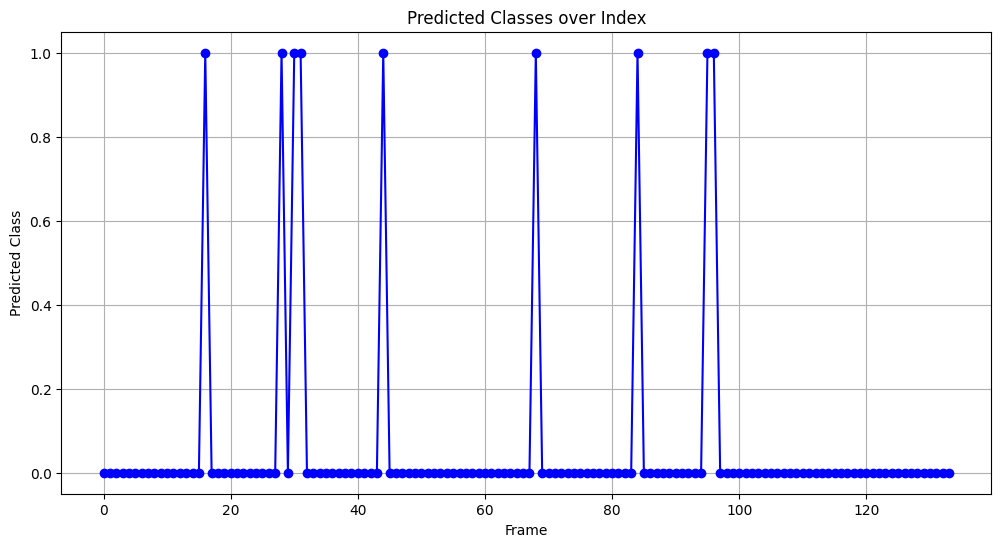

In [21]:
# Assuming 'df' has a 'prediction' column with predicted classes
# Plot predictions over the index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['prediction'], marker='o', linestyle='-', color='b')
plt.xlabel('Frame')
plt.ylabel('Predicted Class')
plt.title('Predicted Classes over Index')
plt.grid(True)
plt.show()

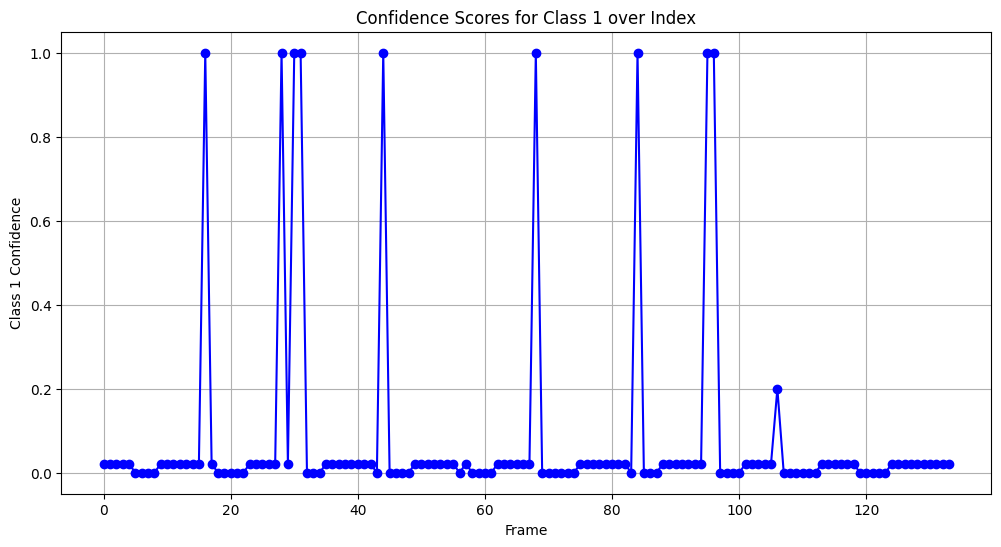

In [22]:
# Plot the confidence scores for class 1 over the index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Class_1_Confidence'], marker='o', linestyle='-', color='b')
plt.xlabel('Frame')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 1 over Index')
plt.grid(True)
plt.show()

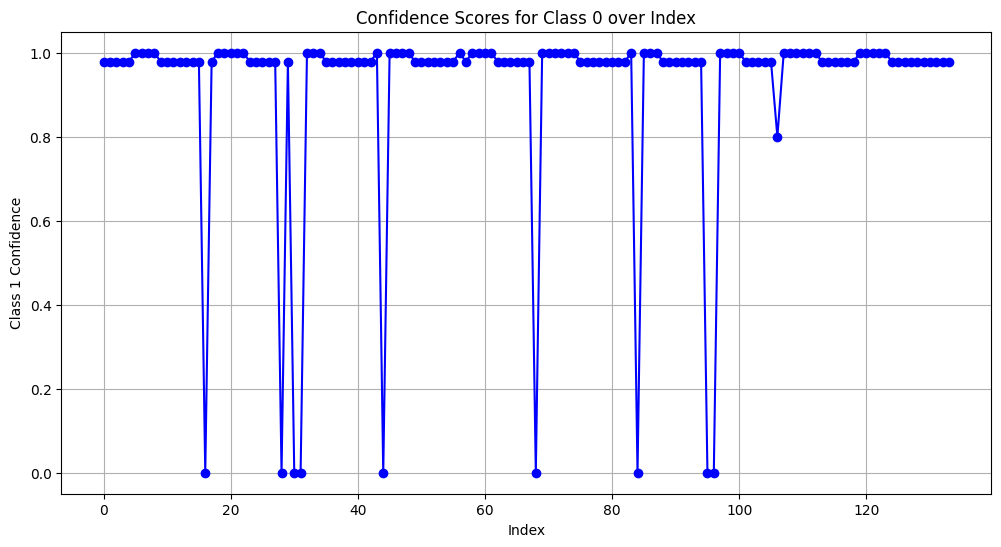

In [23]:
# Plot the confidence scores for class 1 over the index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Class_0_Confidence'], marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 0 over Index')
plt.grid(True)
plt.show()

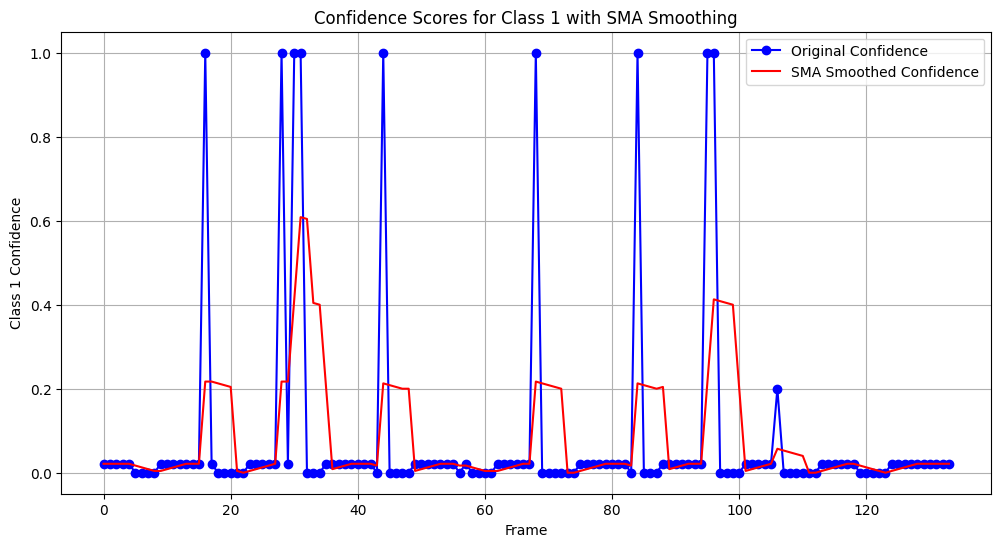

In [24]:
# Plot the original and smoothed confidence scores
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Class_1_Confidence'], marker='o', linestyle='-', color='b', label='Original Confidence')
plt.plot(df.index, df['SMA_Confidence'], linestyle='-', color='r', label='SMA Smoothed Confidence')
plt.xlabel('Frame')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 1 with SMA Smoothing')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,prediction,Class_0_Confidence,Class_1_Confidence,SMA_Confidence,SG_Confidence
0,1.036156,1.328076,0.622291,1.561863,0.530454,0.489376,0.046021,0.041808,0.112344,0.184506,...,5.647221,1.947944,0.882894,1.121087,4.773412,0,0.978723,0.021277,0.021277,0.029014
1,1.041428,1.170048,0.612886,1.565469,0.590890,0.560485,0.053291,0.049629,0.114731,0.186689,...,6.749257,1.949250,0.877600,1.142354,1.930524,0,0.978723,0.021277,0.021277,0.022050
2,1.042877,1.183422,0.618373,1.674895,0.791427,0.732120,0.074341,0.079260,0.118217,0.192500,...,2.576224,1.775274,1.049747,1.114817,1.653158,0,0.978723,0.021277,0.021277,0.016377
3,1.057282,1.208340,0.607911,1.535236,0.853363,0.845752,0.085888,0.086136,0.115187,0.178566,...,5.977320,2.032565,0.950831,1.121813,2.968092,0,0.978723,0.021277,0.021277,0.011992
4,1.053550,1.325134,0.595905,3.956137,0.880901,0.905772,0.109852,0.094173,0.101104,0.161128,...,0.303801,2.013005,0.961625,1.221020,3.488216,0,0.978723,0.021277,0.021277,0.008897


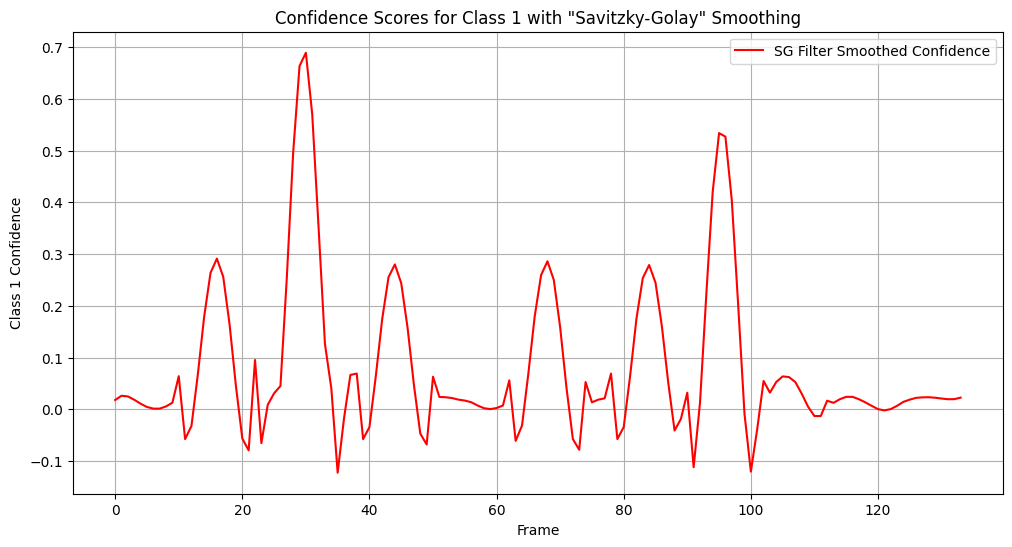

In [26]:
df = original_df.copy()
# Optionally add predictions to the dataframe
df['prediction'] = predictions
df['Class_1_Confidence'] = probabilities[:, 1]

# Define parameters for Savitzky-Golay filter
window_length = 13  # Window length must be odd
polyorder = 4       # Polynomial order

# Apply Savitzky-Golay filter
df['SG_Confidence'] = savgol_filter(df['Class_1_Confidence'], window_length=window_length, polyorder=polyorder)

# Plot the original and smoothed confidence scores
plt.figure(figsize=(12, 6))
# plt.plot(df.index, df['Class_1_Confidence'], marker='o', linestyle='-', color='b', label='Original Confidence')
plt.plot(df.index, df['SG_Confidence'], linestyle='-', color='r', label='SG Filter Smoothed Confidence')
plt.xlabel('Frame')
plt.ylabel('Class 1 Confidence')
plt.title('Confidence Scores for Class 1 with "Savitzky-Golay" Smoothing')
plt.legend()
plt.grid(True)
plt.show()

## Action Trigger Module

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,prediction,Class_1_Confidence,SG_Confidence
0,1.036156,1.328076,0.622291,1.561863,0.530454,0.489376,0.046021,0.041808,0.112344,0.184506,...,0.098177,0.661589,5.647221,1.947944,0.882894,1.121087,4.773412,0,0.021277,0.018058
1,1.041428,1.170048,0.612886,1.565469,0.590890,0.560485,0.053291,0.049629,0.114731,0.186689,...,0.105046,0.668192,6.749257,1.949250,0.877600,1.142354,1.930524,0,0.021277,0.026345
2,1.042877,1.183422,0.618373,1.674895,0.791427,0.732120,0.074341,0.079260,0.118217,0.192500,...,0.109017,0.659517,2.576224,1.775274,1.049747,1.114817,1.653158,0,0.021277,0.024982
3,1.057282,1.208340,0.607911,1.535236,0.853363,0.845752,0.085888,0.086136,0.115187,0.178566,...,0.153144,0.670328,5.977320,2.032565,0.950831,1.121813,2.968092,0,0.021277,0.018622
4,1.053550,1.325134,0.595905,3.956137,0.880901,0.905772,0.109852,0.094173,0.101104,0.161128,...,0.139274,0.668661,0.303801,2.013005,0.961625,1.221020,3.488216,0,0.021277,0.010940


In [28]:
values = df['SG_Confidence']
values.head()

0    0.018058
1    0.026345
2    0.024982
3    0.018622
4    0.010940
Name: SG_Confidence, dtype: float64

In [29]:
# Define thresholds
threshold_class_0 = 0.5
threshold_class_1 = 0.5

# Initialize count for cycles
cycle_count = 0

# Iterate through the dataframe
for i in range(len(df) - 1):
    current_confidence = df.loc[i, 'SG_Confidence']
    next_confidence = df.loc[i + 1, 'SG_Confidence']
    
    # Determine classes based on thresholds
    class_current = 1 if current_confidence >= threshold_class_1 else 0
    class_next = 1 if next_confidence >= threshold_class_1 else 0
    
    # Check for cycle
    if class_current == 0 and class_next == 1:
        cycle_count += 1

print(f'Number of cycles: {cycle_count}')

Number of cycles: 2


## Putting everything together

In [46]:
def predict(video_name,
           window_length=13,
           polyorder=4,
           threshold_class_0 = 0.5,
           threshold_class_1 = 0.5):

    test_dir = '/home/sadat/Desktop/automatic-counting/classifier/data/test_poses'
    video_path = os.path.join(test_dir, video_name + '.npy')
    # Load the NumPy array from the file
    np_array = np.load(video_path)

    # Convert the NumPy array to a DataFrame
    df = pd.DataFrame(np_array)

    # Predict the class for each row
    predictions = clf.predict(df)

    # Get predicted probabilities
    probabilities = clf.predict_proba(df)

    original_df = df.copy()
    df = original_df.copy()

    # Optionally add predictions to the dataframe
    df['prediction'] = predictions

    # Get the predictions proba
    df['Class_0_Confidence'] = probabilities[:, 0]
    df['Class_1_Confidence'] = probabilities[:, 1]

    # Apply Savitzky-Golay filter
    df['SG_Confidence'] = savgol_filter(df['Class_1_Confidence'], window_length=window_length, polyorder=polyorder)
    
    # Initialize count for cycles
    cycle_count = 0

    # Iterate through the dataframe
    for i in range(len(df) - 1):
        current_confidence = df.loc[i, 'SG_Confidence']
        next_confidence = df.loc[i + 1, 'SG_Confidence']

        # Determine classes based on thresholds
        class_current = 1 if current_confidence >= threshold_class_1 else 0
        class_next = 1 if next_confidence >= threshold_class_1 else 0

        # Check for cycle
        if class_current == 0 and class_next == 1:
            cycle_count += 1

    return cycle_count

## Presentation

In [47]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load video
# cap = cv2.VideoCapture("./d40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719fb52af72bf43224086_1.mp4")

# # Define thresholds
# threshold_class_0 = 0.5
# threshold_class_1 = 0.5

# # Get predictions and filtered data
# predictions = df['prediction'].values
# sg_confidence = df['SG_Confidence'].values

# # Create output video writer with higher resolution
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# output_resolution = (1920, 1080)  # Higher resolution
# out = cv2.VideoWriter('output.mp4', fourcc, cap.get(cv2.CAP_PROP_FPS), output_resolution)

# # Initialize frame index and cycle count
# frame_index = 0
# cycle_count = 0

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break
    
#     # Resize frame to output resolution
#     frame = cv2.resize(frame, output_resolution)
    
#     # Plot graph in real-time
#     plt.figure(figsize=(12, 6))
#     plt.plot(df.index[:frame_index+1], df['SG_Confidence'][:frame_index+1], linestyle='-', color='r', label='SG Filter Smoothed Confidence')
#     plt.xlabel('Frame')
#     plt.ylabel('Class 1 Confidence')
#     plt.title('Confidence Scores for Class 1 with Savitzky-Golay Smoothing')
#     plt.legend()
#     plt.grid(True)
    
#     # Convert plot to OpenCV image
#     plt.savefig('plot.png', bbox_inches='tight')
#     plt.close()
#     plot_img = cv2.imread('plot.png')
    
#     # Resize plot image to fit on video frame
#     h, w, _ = frame.shape
#     plot_img = cv2.resize(plot_img, (int(0.4*w), int(0.3*h)))
    
#     # Draw plot on video frame in bottom left corner
#     x_offset = 10
#     y_offset = int(h - plot_img.shape[0] - 10)
#     frame[y_offset:y_offset+plot_img.shape[0], x_offset:x_offset+plot_img.shape[1]] = plot_img
    
#     # Display cycle count in top right corner with smaller font size
#     cv2.putText(frame, f'Cycle Count: {cycle_count}', (int(0.8*w), 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    
#     # Check for cycle
#     if frame_index > 0:
#         current_confidence = df.loc[frame_index-1, 'SG_Confidence']
#         next_confidence = df.loc[frame_index, 'SG_Confidence']
#         class_current = 1 if current_confidence >= threshold_class_1 else 0
#         class_next = 1 if next_confidence >= threshold_class_1 else 0
#         if class_current == 0 and class_next == 1:
#             cycle_count += 1
    
#     # Write frame to output video
#     out.write(frame)
#     cv2.imshow('Frame', frame)
    
#     # Increment frame index
#     frame_index += 1
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release resources
# cap.release()
# out.release()
# cv2.destroyAllWindows()

## Evaluation

In [48]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,salient,video_name
26,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.680204,1.001039,1.818053,6.391051,0.024300,2.098169,0.030116,0.224765,...,1.687835,0.622105,0.251399,0.489040,0.453303,0.072244,0.076263,1.196327,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
27,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.655266,1.038904,1.840115,6.635978,0.019025,1.362402,0.022815,0.176124,...,1.728855,1.089641,0.231580,0.378943,0.475799,0.142584,0.407882,4.539961,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
28,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.641108,1.176112,1.887418,1.006742,0.134968,1.328835,0.016136,3.316055,...,1.607063,0.614543,1.077742,25.187317,0.648971,1.061408,0.024128,1.199147,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
29,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.631566,1.200873,1.934261,1.008189,1.031394,0.937317,0.014289,1.774221,...,1.615238,0.614404,0.189794,0.420378,0.484753,1.060497,0.022992,1.200092,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...
30,train/cow_bite/salient1/747419b046c70c69e41b28...,cow_bite,0.599901,1.378391,1.983248,0.992031,1.331343,1.535677,0.020715,2.975804,...,1.581292,0.600289,0.077822,2.428062,0.501489,1.059688,0.016834,1.196336,0,747419b046c70c69e41b2857b7af91465dcc0c49e0e91c...


In [49]:
names_array = test_df['video_name'].unique()
names_array

array(['747419b046c70c69e41b2857b7af91465dcc0c49e0e91ca96f253da03067dd32',
       'd40739c2aa4b801a2eda2bbb8a554a6ff85e3fc331b719fb52af72bf43224086',
       '85ff8081163fa72a539d5215af9e01f86a078178bd0b2f4b93c71ba033ab456a',
       'ed504fc41cd8eebaf15e43dd858dab5aaadcec172a4773f903e6dfcf8791b38e',
       'a84ae1282abc51e5698d2b63472b892cae3ffdabacc66c9bcf1efabdf637b1e5',
       'e151c20b878c4425ce832d2f5120a218f4e31b765ec2a352130a5a877fddd041',
       '95040dc15ce9ada82353103a13d1b395c937a9ea6747159f631bfa492b98373f',
       '3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b487627190a1e4ac88f',
       '0baf219dc65f856d93429bfcaf5c6d9a1f2a8e813cc452f01f4819d32baca3d5',
       '73c745847dc41f6e0c54fefcadfd13613a200d58b7073017124483409638c9be',
       '10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251402e6112e4407de2e7'],
      dtype=object)

In [50]:
df = pd.read_csv('./data/cow_bite_links_1407_clipped.csv')
df.head()

,type,name,count,L1,L2,L3,L4,L5,L6,L7,...,L131,L132,L133,L134,L135,L136,L137,L138,L139,L140
0,cow_bite,1cd30bf7a77bbfaaf85acb2b27da587a74e5951067ba96...,8,0,15,29.0,39.0,52.0,64.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,18,0,9,20.0,27.0,39.0,46.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,11,0,10,18.0,28.0,38.0,45.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,9,22.0,33.0,46.0,55.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,10,22.0,30.0,41.0,51.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df.iloc[0]['name']

'1cd30bf7a77bbfaaf85acb2b27da587a74e5951067ba962b500fd088e25a937b_1.mp4'

In [41]:
# Filter rows where the 'name' column contains any of the substrings in names_array
filtered_df = df[df['name'].apply(lambda x: any(name in x for name in names_array))]

# Display the filtered DataFrame
filtered_df.head()

,type,name,count,L1,L2,L3,L4,L5,L6,L7,...,L131,L132,L133,L134,L135,L136,L137,L138,L139,L140
3,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,9,22.0,33.0,46.0,55.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,10,22.0,30.0,41.0,51.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,cow_bite,10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251...,17,0,7,25.0,31.0,50.0,59.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cow_bite,10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251...,12,0,10,404.0,412.0,426.0,438.0,451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,cow_bite,10f1a9b90589c2bc657320dc4958fb19ea2d51fbcdb251...,13,0,15,31.0,44.0,59.0,67.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
predict(df.iloc[0]['name'].split('.')[0])

9

In [53]:
df['prediction'] = df['name'].apply(lambda x: predict(x.split('.')[0]))

In [54]:
df.head()

,type,name,count,L1,L2,L3,L4,L5,L6,L7,...,L132,L133,L134,L135,L136,L137,L138,L139,L140,prediction
0,cow_bite,1cd30bf7a77bbfaaf85acb2b27da587a74e5951067ba96...,8,0,15,29.0,39.0,52.0,64.0,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,18,0,9,20.0,27.0,39.0,46.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,cow_bite,2f4338b600baddf8b021162744427b9faaf7ec28230638...,11,0,10,18.0,28.0,38.0,45.0,55.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
3,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,9,22.0,33.0,46.0,55.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
4,cow_bite,3c86acfbc4289cc6d83adc3268a97e3eb2ecf1316d731b...,17,0,10,22.0,30.0,41.0,51.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


## Results

In [55]:
# Calculate MAE
mae = (df['count'] - df['prediction']).abs().mean()

# Calculate Off-by-One Accuracy
off_by_one_accuracy = (df['count'] - df['prediction']).abs() <= 1
off_by_one_accuracy = off_by_one_accuracy.mean()  # Convert boolean values to percentage

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Off-by-One Accuracy: {off_by_one_accuracy * 100:.2f}%")

Mean Absolute Error (MAE): 2.3666666666666667
Off-by-One Accuracy: 61.11%
